In [11]:
#import libs and tools
import warnings
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import seaborn as sns
from pandas import datetime
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [12]:
color = sns.color_palette()
print('Please wait. Importing data...')
df = pd.read_excel('C:/Users/ThinkPad/Desktop/Masterarbeit/PM10_2019.xlsx',header=0,encoding='utf-8')
print('import completed.')

#def date_parser(x):
#    return datetime.strptime(x, "%d.%m.%Y %H:%M")
df[['date','time']] = df['Zeitpunkt'].str.split(expand=True)
df['datetime'] = (pd.to_datetime(df.pop('date'), format='%d.%m.%Y') + 
                  pd.to_timedelta(df.pop('time') + ':00'))
print (df)




Please wait. Importing data...
import completed.
             Zeitpunkt Andechs/Rothenfeld Ansbach/Residenzstraße  \
0     01.01.2019 01:00                  5                     88   
1     01.01.2019 02:00                  8                     35   
2     01.01.2019 03:00                 10                     25   
3     01.01.2019 04:00                 13                     28   
4     01.01.2019 05:00                 13                     24   
...                ...                ...                    ...   
8755  31.12.2019 20:00                 15                     41   
8756  31.12.2019 21:00                 18                     32   
8757  31.12.2019 22:00                 19                     56   
8758  31.12.2019 23:00                 19                     80   
8759  31.12.2019 24:00                 18                     81   

     Augsburg/Bourges-Platz Augsburg/Karlstraße Augsburg/Königsplatz  \
0                       300                 483               

In [13]:

data = df[['datetime', 'Augsburg/Königsplatz']]
#data['date'] = data['Zeitpunkt'].map(lambda x: date_parser(x))
data['pm10']=data['Augsburg/Königsplatz']
print(data)
data.pm10.describe()

                datetime Augsburg/Königsplatz pm10
0    2019-01-01 01:00:00                  322  322
1    2019-01-01 02:00:00                   93   93
2    2019-01-01 03:00:00                   50   50
3    2019-01-01 04:00:00                   41   41
4    2019-01-01 05:00:00                   19   19
...                  ...                  ...  ...
8755 2019-12-31 20:00:00                   77   77
8756 2019-12-31 21:00:00                   71   71
8757 2019-12-31 22:00:00                   41   41
8758 2019-12-31 23:00:00                   46   46
8759 2020-01-01 00:00:00                   59   59

[8760 rows x 3 columns]


count     8760
unique     100
top          2
freq       443
Name: pm10, dtype: int64

                               datetime   pm10
datetime                                      
2019-01-01 01:00:00 2019-01-01 01:00:00  322.0
2019-01-01 02:00:00 2019-01-01 02:00:00   93.0
2019-01-01 03:00:00 2019-01-01 03:00:00   50.0
2019-01-01 04:00:00 2019-01-01 04:00:00   41.0
2019-01-01 05:00:00 2019-01-01 05:00:00   19.0


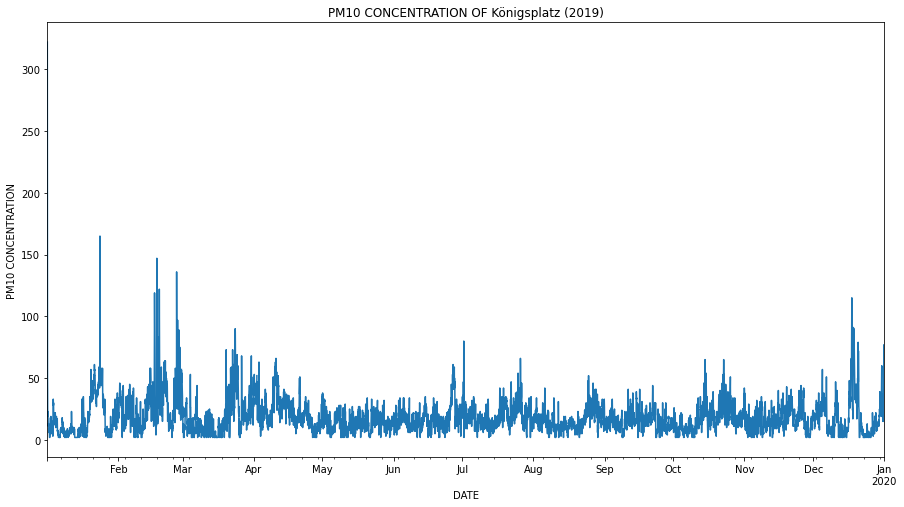

In [14]:
data=data[['datetime','pm10']]
data['pm10'] = data['pm10'].map(lambda x: str(x))
data['pm10'] = pd.to_numeric(data['pm10'],errors='coerce')
data.index = data['datetime']
#data['datetime'] = pd.to_datetime(data['datetime'])
#data.set_index('datetime')
#data['data.apply(pd.to_numeric)'] = pd.to_numeric(data['pm10'])
print(data.head())
data.pm10.plot(figsize=[15, 8])
plt.xlabel("DATE")
plt.ylabel("PM10 CONCENTRATION")
plt.title("PM10 CONCENTRATION OF Königsplatz (2019)")
plt.show()


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2019-01-01 01:00:00 to 2020-01-01 00:00:00
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  8760 non-null   datetime64[ns]
 1   pm10      8754 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 205.3 KB


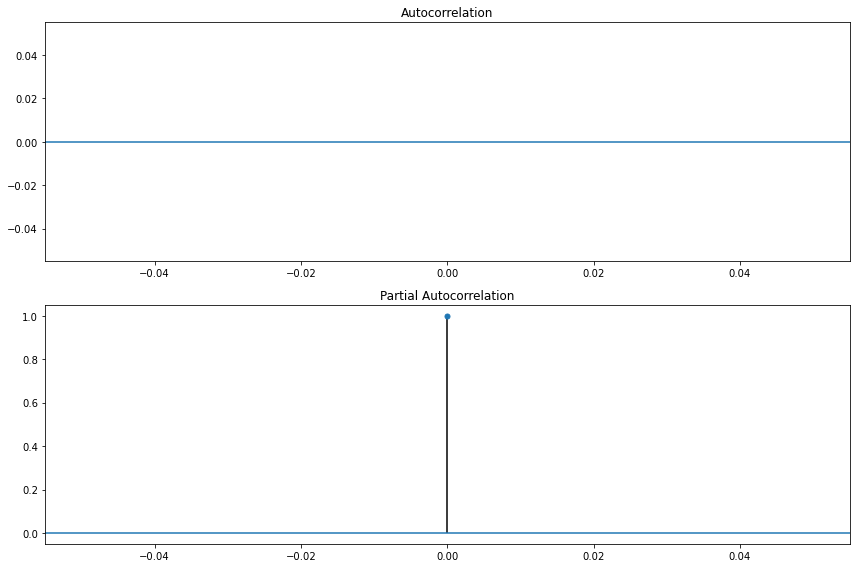

In [19]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
 
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data.pm10,lags=48,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
#plt.xlabel("lag",loc="right")
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data.pm10,lags=48, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
#plt.xlabel("lag",loc="right")
fig.tight_layout()


In [8]:
import itertools
p=d=q=range(0,2)
print("p=",p,"d=",d,"q=",q)
#产生不同的pdq元组,得到 p d q 全排列
pdq=list(itertools.product(p,d,q))
print("pdq:\n",pdq)
seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]
print('SQRIMAX:{} x {}'.format(pdq[1],seasonal_pdq[1]))

p= range(0, 2) d= range(0, 2) q= range(0, 2)
pdq:
 [(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
SQRIMAX:(0, 0, 1) x (0, 0, 1, 12)


In [9]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data.pm10,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
 
            results = mod.fit()
 
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:79248.54277294507
D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:74679.04613706548
D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.p

D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
D:\ANACONDA\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  warnings.warn('No frequency information was'
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7462      0.005    148.553      0.000       0.736       0.756
ma.L1         -0.9405      0.004   -239.844      0.000      -0.948      -0.933
ar.S.L12       0.0218      0.004      5.059      0.000       0.013       0.030
ma.S.L12      -0.9790      0.002   -506.392      0.000      -0.983      -0.975
sigma2        34.4936      0.117    293.747      0.000      34.263      34.724


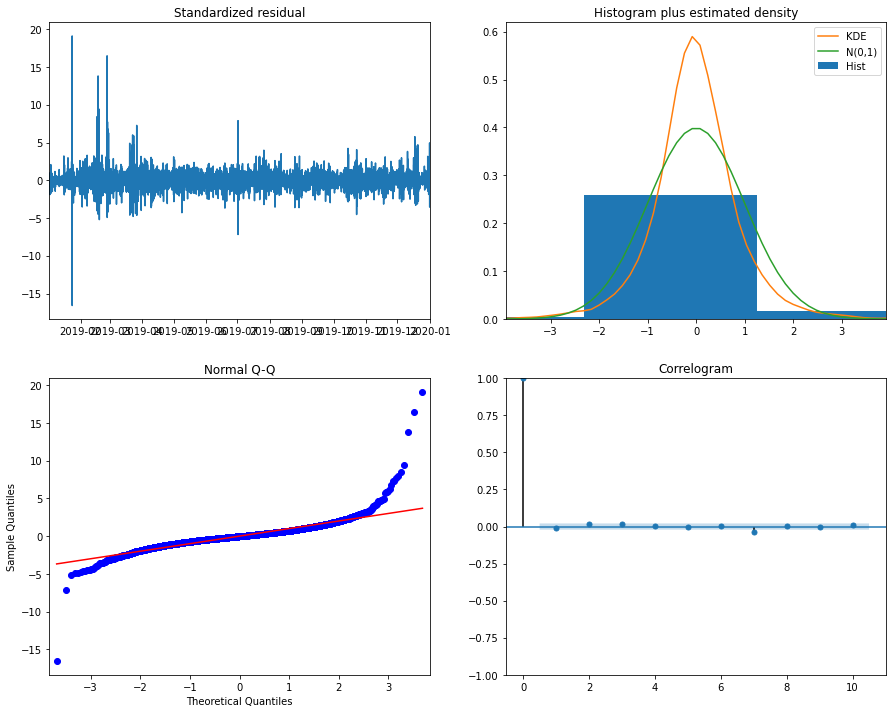

In [18]:
mod = sm.tsa.statespace.SARIMAX(data.pm10,
order=(1, 1, 1),
seasonal_order=(1, 1, 1, 12),
enforce_stationarity=False,
enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])
results.plot_diagnostics(figsize=(15, 12))
plt.show()

The Root Mean Squared Error of our prediction is 5.0
2020-01-01 01:00:00    54.376498
2020-01-01 02:00:00    49.015932
2020-01-01 03:00:00    46.278241
2020-01-01 04:00:00    43.228522
2020-01-01 05:00:00    43.794390
2020-01-01 06:00:00    43.943399
2020-01-01 07:00:00    43.901260
2020-01-01 08:00:00    45.381774
2020-01-01 09:00:00    45.701469
2020-01-01 10:00:00    42.465631
2020-01-01 11:00:00    40.789770
2020-01-01 12:00:00    41.422974
2020-01-01 13:00:00    41.327677
2020-01-01 14:00:00    39.673411
2020-01-01 15:00:00    39.397823
2020-01-01 16:00:00    38.211662
2020-01-01 17:00:00    40.191518
2020-01-01 18:00:00    41.302285
2020-01-01 19:00:00    41.739998
2020-01-01 20:00:00    43.327311
2020-01-01 21:00:00    44.245919
2020-01-01 22:00:00    41.936592
2020-01-01 23:00:00    40.372413
2020-01-02 00:00:00    40.928288
Freq: H, dtype: float64


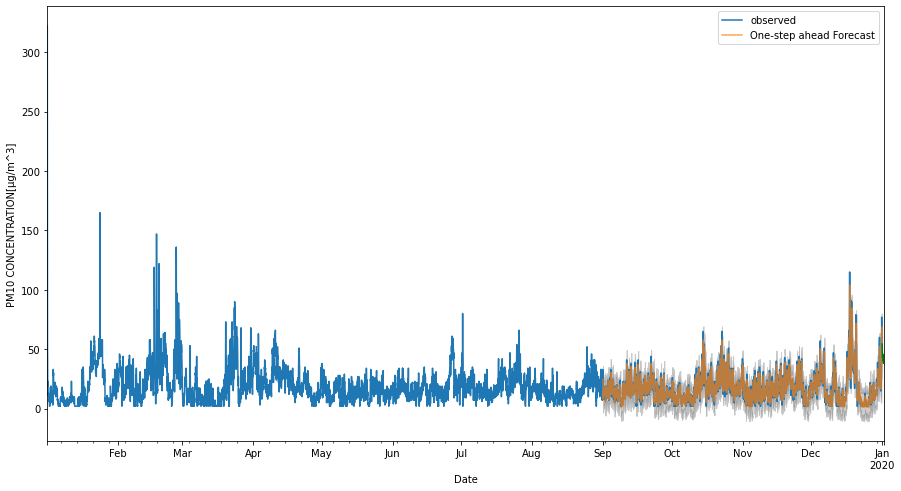

In [11]:
pred = results.get_prediction(start=pd.to_datetime('2019-09-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = data.pm10['2019-01':].plot(figsize=[15, 8], label='observed')
pred.predicted_mean.plot(figsize=[15, 8], ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('PM10 CONCENTRATION[μg/m^3]')
plt.legend()
pm10_forecasted = pred.predicted_mean
pm10_truth = data.pm10['2019-09-01':]
# Compute the mean square error
rmse = (((pm10_forecasted - pm10_truth) ** 2).mean()) ** 0.5
print('The Root Mean Squared Error of our prediction is {}'.format(round(rmse, 2)))
forecast = results.forecast(24)
print(forecast)
forecast.plot(figsize=[15, 8], color='green', label='future predictions')


In [12]:
accuracy =abs((pm10_forecasted - pm10_truth)/pm10_truth)
a=np.mean(accuracy)
print(accuracy)
print(a)

2019-09-01 00:00:00    0.117857
2019-09-01 01:00:00    0.336715
2019-09-01 02:00:00    0.806506
2019-09-01 03:00:00    0.855606
2019-09-01 04:00:00    0.869644
                         ...   
2019-12-31 20:00:00    0.622469
2019-12-31 21:00:00    0.966816
2019-12-31 22:00:00    0.490783
2019-12-31 23:00:00    0.820143
2020-01-01 00:00:00    0.738741
Freq: H, Length: 2929, dtype: float64
0.6929828140562525


2020-01-01 01:00:00    54.376498
2020-01-01 02:00:00    49.015932
2020-01-01 03:00:00    46.278241
2020-01-01 04:00:00    43.228522
2020-01-01 05:00:00    43.794390
2020-01-01 06:00:00    43.943399
2020-01-01 07:00:00    43.901260
2020-01-01 08:00:00    45.381774
2020-01-01 09:00:00    45.701469
2020-01-01 10:00:00    42.465631
2020-01-01 11:00:00    40.789770
2020-01-01 12:00:00    41.422974
2020-01-01 13:00:00    41.327677
2020-01-01 14:00:00    39.673411
2020-01-01 15:00:00    39.397823
2020-01-01 16:00:00    38.211662
2020-01-01 17:00:00    40.191518
2020-01-01 18:00:00    41.302285
2020-01-01 19:00:00    41.739998
2020-01-01 20:00:00    43.327311
2020-01-01 21:00:00    44.245919
2020-01-01 22:00:00    41.936592
2020-01-01 23:00:00    40.372413
2020-01-02 00:00:00    40.928288
Freq: H, dtype: float64


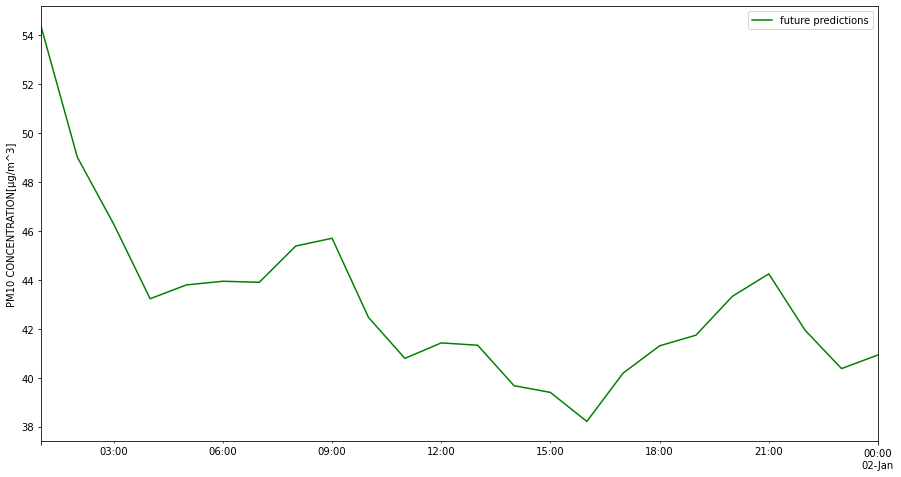

In [17]:
forecast = results.forecast(24)
print(forecast)
forecast.plot(figsize=[15, 8], color='green', label='future predictions')
plt.ylabel('PM10 CONCENTRATION[μg/m^3]')
plt.legend()